# Dimensionality Reduction

Selama belajar mengenai _Data Science_ atau _Data Analytics_ kita tentu sering mendengar tentang _**Dimensionality Reduction**_. Namun apakah kita sudah mengerti apa itu _**Dimensionality Reduction**_, kenapa kita butuh untuk melakukan itu, teknik-teknik apa saja yang dapat kita gunakan untuk melakukan _**Dimensionality Reduction**_? 

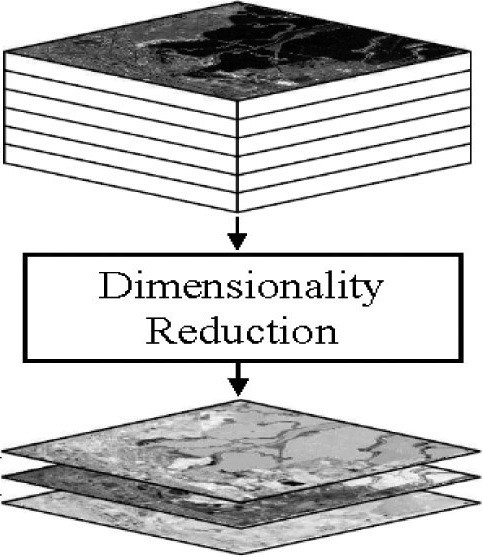

Jumlah _variable_ atau _feature_ yang dari suatu dataset sering disebut juga dengan dimensi dari data tersebut. _**Dimensionality Reduction**_ adalah suatu teknik untuk mengurangi dimensi pada data. Semakin banyak _variable_ / dimensi akan membuat model semakin sulit untuk melakukan _predictive modelling_, atau seringkali disebut sebagai kutukan dimensi (_curse of dimensionality_).


_**Dimensionality Reduction**_ sering digunakan untuk keperluan visualisasi data. Namun teknik tersebut juga merupakan metode _machine learning_ yang dapat digunakan untuk meringankan kerja pemodelan _classification_ dan _regression_ untuk menangkap pola dan mendapatkan hasil prediksi yang lebih baik.

Pada pembahasan ini, kita akan fokus kepada poin-poin berikut:
- Masalah akibat _variable_ input yang banyak pada data
- _Dimensionality Reduction_
- Teknik-teknik _Dimensionality Reduction_

## Masalah akibat banyak _variable_ input pada data

Mungkin kita sering berpikir bahwa semakin banyak input kita berikan dari dataset ke dalam model _machine learning_ kita, kita dapat mendapatkan hasil dari _fit_ yang lebih baik. Namun, ternyata performa dari algoritma _machine learning_ yang kita gunakan dapat menngalami degradasi / penurunan dengan input _variable_ yang terlalu banyak! 

Jika data yang kita miliki digambarkan dalam bentuk kolom dan baris, seperti _excel spreadsheet_, maka input _variable_ (sering juga disebut dengan _feature_) adalah kolom-kolom yang kita masukkan kedalam model untuk memprediksi _target variable_ kita. Memiliki data dengan dimensi yang besar berarti volume nya juga sangat besar, namun seringkali data-data yang kita punya hanya mewakili sampel yang kecil dan tidak representatif. Hal tersebut juga dapat berdampak fatal kepada performa dari model _machine learning_ yang kita fit pada data yang memiliki terlalu banyak input _variables_, yang sering disebut juga kutukan dari dimensi (_curse of dimensionality_). 

Maka dari itu, seringkali pengurangan jumlah input _variable_ menjadi hal yang dibutuhkan. Hal ini bertujuan untuk mengurangi jumlah dimensi pada data, sehingga disebut juga dengan reduksi dimensi atau _**Dimensionality Reduction**_. 

## _**Dimensionality Reduction**_

_**Dimensionality Reduction**_ adalah teknik yang digunakan untuk mengurangi dimensi dari data _training_.

Saat menghadapi data berdimensi tinggi (_high dimensional data_), reduksi dimensi dengan melakukan projeksi dari data kita ke dimensi yang lebih rendah yang dapat men-_capture_ inti dari data kita. Ini disebut juga _**Dimensionality Reduction**_.

Data berdimensi tinggi berarti data yang memiliki ratusan, ribuan, atau bahkan jutaan input _variable_. Lebih sedikit input dimensi seringkali berarti lebih sedikit parameter atau struktur yang lebih sederhana pada model _machine learning_ yang kita, disebut juga dengan derajat kebebasan (_degree of freedom_). Model yang dengan derajat kebebasan yang terlalu banyak kemungkinan akan _overfit_ pada data _training_, sehingga tidak dapat memiliki performa yang baik pada data yang baru. Maka dari itu kita ingin memiliki model sederhana, lalu input data dengan sedikit input _variable_. Hal ini berlaku terutama pada model-model linear dimana jumlah input dan derajat kebebasan seringkali berhubungan erat.

_**Dimensionality Reduction**_ adalah teknik preparasi data yang dilakukan sebelum  _modelling_ . Hal tersebut dapat dilakukan setelah pembersihan data (_data cleaning_) dan _data scaling_ sebelum melalukan _training_ model prediksi. Maka dari itu, dimensi reduksi yang dilakukan pada data _training_ perlu dilakukan juga kepada data baru seperti data _validation_, data _testing_, dan data yang digunakan untuk prediksi dari model yang sudah selesai.


## Teknik-teknik _**Dimensionality Reduction**_

Pada bagian ini kita akan membahas teknik-teknik dimensi reduksi melalui studi kasus pada data. Adapun teknik-tenik dimensi reduksi yang akan kita gunakan adalah:
1. Principal Component Analysis (PCA)
2. Singular Value Decomposition (SVD)
3. Linear Discriminant Analysis (LDA)

### 1. Import library serta data yang dibutuhkan

In [1]:
# import library
from sklearn.datasets import load_wine
import pandas as pd
import math as mt
from numpy import linalg as LA
import numpy as np
from numpy import mean
from numpy import std
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt\
from matplotlib import colors
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Data yang digunakan merupakan data wine yang dapat kita ambil melalui dataset sklearn

In [2]:
def get_dataset():
  wine = load_wine()
  X = pd.DataFrame(wine.data, columns=wine.feature_names)
  y = pd.Categorical.from_codes(wine.target, wine.target_names)
  features_num = len(wine.feature_names)
  class_num = len(wine.target_names)
  return X, y, features_num, class_num

In [4]:
X,y,features_num,class_num = get_dataset()
print(X.shape, y.shape)

(178, 13) (178,)


Data yang kita gunakan terdiri dari 178 sampel dan 13 features

In [5]:
y.unique()

['class_0', 'class_1', 'class_2']
Categories (3, object): ['class_0', 'class_1', 'class_2']

Target variable yang kita miliki terdiri dari 3 _class_ yaitu **class_0**, **class_1**, **class_2**

In [6]:
df = X.join(pd.Series(y, name='class'))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


### 2. Membuat baseline _accuracy_ untuk model _Decision Tree Classifier_

Menggunakan train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[18  0  0]
 [ 1 16  0]
 [ 0  1  9]]
0.9555555555555556


Menggunakan Repeated Stratified KFold dengan **n_splits=3** (disesuaikan dengan jumlah kelas) dan **n_repeats=2**

('baseline', 0.8932674199623353, 0.02691307080619472)


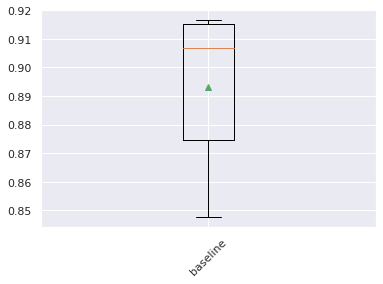

In [44]:
def get_models():
  models = dict()
  steps = [('dt', DecisionTreeClassifier())]
  models['baseline'] = Pipeline(steps=steps)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print((name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

Dari hasil confusion matrix serta accuracy dengan train-test split dapat kita lihat bahwa model berhasil melakukan prediksi 95.555% _class_ yang ada, hanya terjadi 2 kesalahan model untuk menentukan _class_ dari wine. Dengan menggunakan RepeatedStratifiedKFold (n_split = 3, n_repeats=2) didapatkan rata-rata dari _accuracy_ model berada di 89.326%.

### 3. Principal Component Analysis (PCA)

Pada bagian ini, kita akan menambahkan _preprocessing_ berupa Principal Component Analysis (PCA) sebelum masuk pada bagian modelling. 

Principal Component Analysis merupakan salah satu teknik dimensi rekduksi yang sering digunakan. Prinsip kerja dari PCA adalah merangkum data dari semua _features_, lalu membuat sumbu-sumbu baru berupa Principal Component (PC). PC-PC yang terbentuk akan saling tegak lurus dan urut sesuai tingkat kepentingan PC tersebut. Tingkat kepentingan PC didasarkan pada informasi data pada PC, yang dapat dilihat dari nilai _variance_. Sehingga nilai _variance_ PC1 > nilai _variance_ PC2 > ... > nilai _variance_ PC(n). 

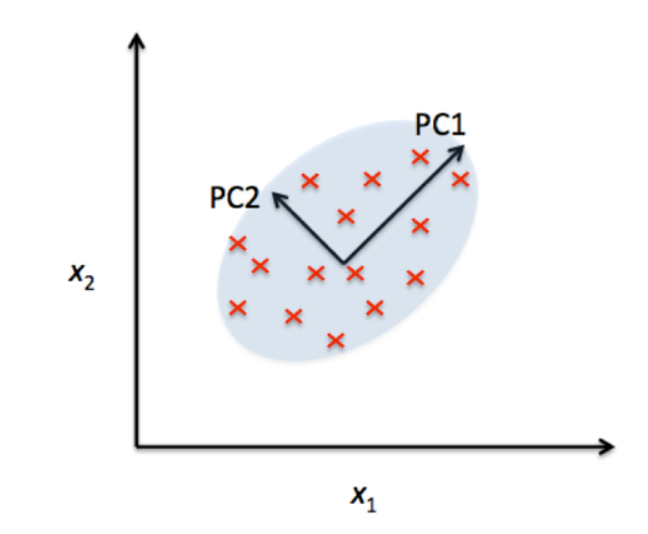

PCA merupakan teknik _unsupervised_. Hal ini berarti PCA tidak memperhatikan jumlah kelas pada _variable_ target data. Sehingga jumlah komponen yang dapat kita gunakan bergantung pada jumlah _features_ yang data kita miliki.

Pada bagian ini kita akan melakukan transformasi pada _features_ yang kita punya menjadi 2 _Principal Components_ (PC). 

In [8]:
from sklearn.decomposition import PCA
# PCA dengan 2 komponen (PC)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [9]:
# melihat variance dari setiap PC 
print(pca.explained_variance_ratio_)
# melihat total variance
print(pca.explained_variance_ratio_.sum())

[0.9981 0.0017]
0.9998271461166032


Terlihat bahwa PC1 memiliki nilai _variance_ yang tinggi yaitu 0.9981, sedangkan PC2 memiliki nilai _variance_ yang jauh lebih kecil yaitu 0.0017. Namun nilai total _variance_ yang didapatkan tidak penuh (1). Hal ini terjadi karena kita hanya menggunakan 2 _Principal Component_.

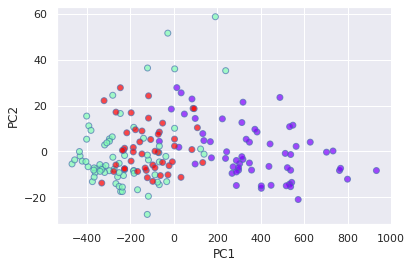

In [10]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Dari plot di atas kita dapat melihat bahwa PC1 merangkum banyak informasi pada data yang kita miliki.

Selanjutnya kita akan melakukan _modelling_ dengan _Decision Tree Classifier_ menggunakan PC1 dan PC2 sebagai _variable_ input pada model.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[14  1  3]
 [ 1 11  5]
 [ 1  6  3]]
0.6222222222222222


Kita mendapatkan nilai _accuracy_ berada pada 62.222%, nilai yang jauh dari baseline _accuracy_ yang kita miliki. Banyak terjadi kesalahan prediksi yang terjadi. 

Mengapa hal ini terjadi? Hal ini terjadi karena kita hanya menggunakan 2 _Principal Component_ dari data yang kita miliki. Selanjutnya kita akan membandingkan _accuracy_ dari model terhadap jumlah _Principal Component_ yang kita gunakan sebagai input _variable_ pada model.

('0', nan, nan)
('1', 0.6940677966101695, 0.04930113694983485)
('2', 0.6602165725047081, 0.02848321425840792)
('3', 0.769774011299435, 0.05360561818661654)
('4', 0.8540960451977403, 0.04757902764453327)
('5', 0.8427966101694916, 0.06179186168649702)
('6', 0.8401129943502825, 0.04240300247674755)
('7', 0.8344632768361583, 0.0530993302443378)
('8', 0.8289548022598869, 0.053546226656403365)
('9', 0.823352165725047, 0.04904518512154841)
('10', 0.8374293785310734, 0.050754190985398163)
('11', 0.8513182674199623, 0.054788101406196256)
('12', 0.8233992467043315, 0.05340213906352062)


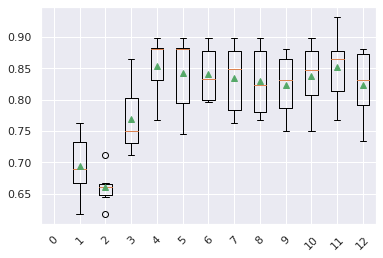

In [17]:
def get_models():
  models = dict()
  for i in range(features_num):
    steps = [('pca', PCA(n_components=i)), ('dt', DecisionTreeClassifier())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print((name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Dari plot terlihat bahwa nilai _accuracy_ terjadi saat menggunakan 4 _Principal Component_ (PC). Namun nilai _accuracy_ tertinggi yang didapatkan tidak sebaik nilai _accuracy_ baseline (tanpa _preprocessing_ PCA)

### 4. Singular Value Decomposition

Selain menggunakan PCA, kita juga bisa melakukan reduksi dimensi dengan teknik _Singular Value Decomposition_ (SVD). CSV juga merupakan teknik dimensi reduksi linear. Cara kerjanya sangat mirip dengan PCA, namun tidak dilakukan pemusatan data ke titik 0 sebelum membuat SVD. Hal ini berarti, SVD cocok untuk digunakan pada data yang bersifat _sparse_. 

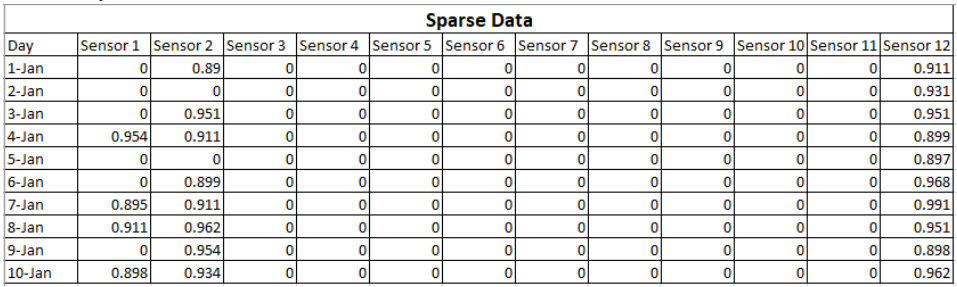

Berikut merupakan contoh data _sparse_, yaitu data yang banyak mengandung nilai **0**. Biasanya terdapat pada data _record_ dari sensor-sensor. Nilai **0** bukan merupakan missing value, namun nilai sebenarnya. Pada prakteknya TruncatedSVD sangat berguna pada data sparse yang berukuran besar yang tidak dapat dipusatkan tanpa penggunakan memory yang besar.

Selanjutnya kita akan mencoba melakukan _pre-processing_ yaitu reduksi dimensi dengan menggunakan SVD

In [18]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X, y)

In [19]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())

[0.9877 0.0121]
0.9997221592711523


Terlihat bahwa SV1 memiliki nilai _variance_ yang tinggi yaitu 0.9877, sedangkan SV2 memiliki nilai _variance_ yang jauh lebih kecil yaitu 0.0121. Namun nilai total _variance_ yang didapatkan tidak penuh (1). Hal ini terjadi karena kita hanya menggunakan 2 _Singular Value_.

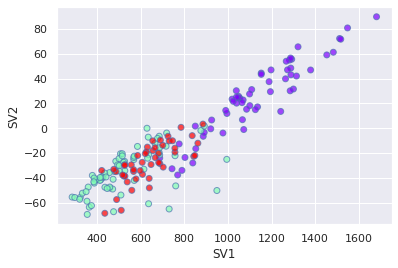

In [20]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.scatter(
    X_svd[:,0],
    X_svd[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Dari plot di atas kita dapat melihat bahwa SVD tidak mengubah posisi pusat dari data ke titik 0, berbeda dengan yang terjadi pada PCA

Selanjutnya kita akan melakukan _modelling_ dengan _Decision Tree Classifier_ menggunakan SV1 dan SV2 sebagai _features_ input pada model.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[17  0  1]
 [ 1 12  4]
 [ 0  4  6]]
0.7777777777777778


Kita mendapatkan nilai _accuracy_ sebesar 77.777% dengan 2 SV sebagai input _variable_ pada model yang kita gunakan. Selanjutkan kita akan membandingkan _accuracy_ terhadap jumlah SV yang kita input sebagai _variable_ input ke model.

('0', nan, nan)
('1', 0.6744350282485875, 0.043075699906267334)
('2', 0.674105461393597, 0.05076412575874809)
('3', 0.6852165725047081, 0.06444180554417693)
('4', 0.8709510357815443, 0.022087202332219995)
('5', 0.8849811676082863, 0.025796810962315685)
('6', 0.8680790960451978, 0.042597646183221205)
('7', 0.8568738229755178, 0.043911387244563976)
('8', 0.8371939736346515, 0.05351092462673609)
('9', 0.8596986817325799, 0.04162799976302293)
('10', 0.8567796610169491, 0.044394642370774874)
('11', 0.8400188323917136, 0.051955305901733494)
('12', 0.8429849340866289, 0.05392556386929065)


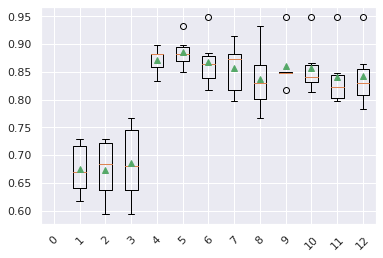

In [29]:
def get_models():
  models = dict()
  for i in range(features_num):
    steps = [('svd', TruncatedSVD(n_components=i)), ('dt', DecisionTreeClassifier())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print((name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Dari plot di atas kita dapat melihat bahwa _accuracy_ terbaik didapatkan dengan 5 SV sebagai _variable_ input pada model. Nilai _accuracy_ yang didapatkan belum sebaik _accuracy_ baseline (tanpa _preprocessing_ SVD)

Selain dapat berguna untuk mereduksi dimensi dari data, SVD juga dapat berguna untuk mereduksi _noise_ di data.

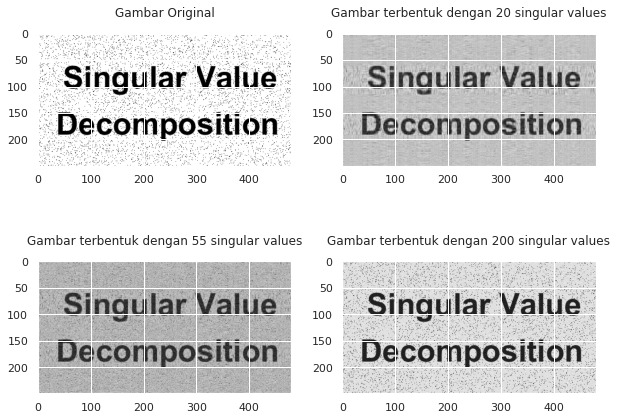

In [31]:
mat = plt.imread("text.png")

# Adding noise
noise = np.random.rand(mat.shape[0], mat.shape[1])
mat[noise > 0.95] = 0

# SVD 
U, s, VT = LA.svd(mat)

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

fig, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)

axes[0, 0].imshow(mat, cmap='gray')
axes[0, 0].set_title("Gambar Original", y=1.08)

k_list = [20, 55, 200]
for i in range(1, 4):
    k = k_list[i-1]
    mat_rank_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
    axes[i // 2, i % 2].imshow(mat_rank_k, cmap='gray')
    axes[i // 2, i % 2].set_title("Gambar terbentuk dengan {} singular values".format(k), y=1.08)

plt.show()

Pada gambar di atas terlihat bahwa seiring dengan naiknya derajat SV, maka _noise_ yang dihasilkan akan semakin muncul. Hal ini membuktikan bahwa dengan dimensi reduksi menggunakan SVD, kita dapat meminimasi _noise_ yang muncul pada data, pada hal ini data gambar.

### Linear Discriminant Analysis (LDA)

Di bagian ini, kita akan menambahkan sebuah _pre-processing_ yaitu _Linear Discriminant Analysis_ (LDA). Prinsip kerja LDA adalah membuat sumbu/komponen baru (LD) untuk merepresentasikan _features_ yang ada pada data. Berbeda dengan SVD dan PCA yang merupakan teknik _unsupervised_. LDA merupakan teknik yang bersifat _supervised_ sehingga memperhatikan _class_ yang ada pada _variable_ target. Hal ini menyebabkan jumlah komponen (LD) yang dapat dibentuk oleh LDA bergantung dengan banyaknya kelas yang ada di _variable_ target. Jumlah LD maksimum yang dapat dibentuk adalah (jumlah kelas _variable_ target **-** **1**).

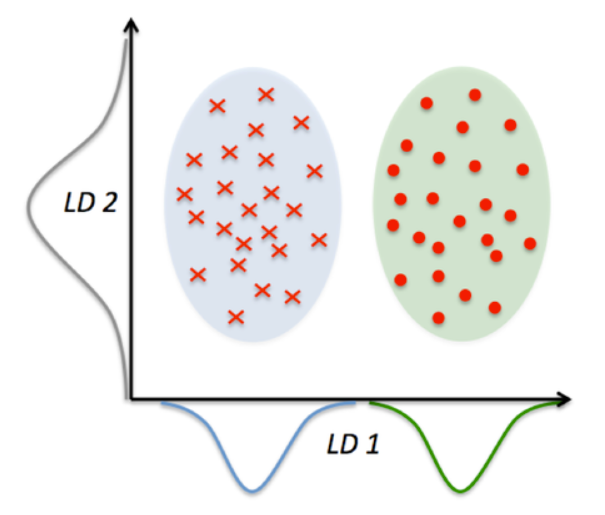

Prinsip kerja LDA hampir serupa dengan PCA dan SVD, namun yang membedakan adalah Linear Discriminant (LD) yang terbentuk memiliki derajat kepentingan berupa separasi pada _class_ yang ada di _variable_ target. 

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [33]:
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[0.6875 0.3125]
1.0


Kita dapat melihat bahwa nilai variance pada LD 1 dan 2 tidak memiliki perbedaan yang sangat jauh seperti yang terjadi di PCA dan SVD, dan total _variance_ dari 2 LDA mencapai nilai penuh (1). Hal ini terjadi karena 2 LD yang terbentuk merupakan jumlah maksimal komponen (LD) yang dapat terbentuk karena jumlah kelas yang dimiliki _variable_ target adalah 3 (jumlah komponen maks = jumlah kelas - 1).

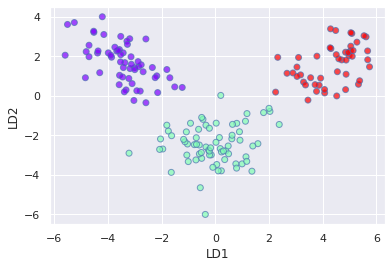

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Terlihat dari plot di atas bahwa LDA lebih fokus untuk melakukan separasi kelas pada data.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[18  0  0]
 [ 0 17  0]
 [ 0  0 10]]
1.0


Hasil _accuracy_ dengan _preprocessing_ menunjukkan nilai 100%. Artinya model mampu memprediksi dengan benar keseluruhan data. Hal ini menunjukkan bahwa LDA cocok digunakan sebagai preprocessing untuk keperluan _modelling classification_.

('0', nan, nan)
('1', 0.9100282485875706, 0.03204098457876506)
('2', 0.9747645951035783, 0.020953945078269122)


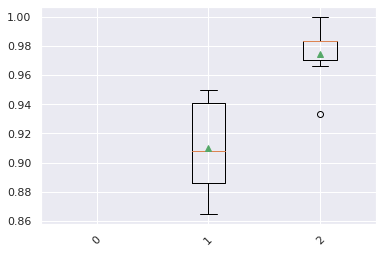

In [37]:
def get_models():
  models = dict()
  # iterasi dengan maksimum nilai adalah (jumlah kelas - 1)
  for i in range(class_num):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('dt', DecisionTreeClassifier())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print((name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

Dari hasil di atas terlihat bahwa nilai _accuracy_ yang didapatkan dengan 1 LD sudah lebih baik dari _accuracy_ baseline (tanpa _preprocessing_ LDA). LDA baik untuk digunakan pada tahap _preprocessing_ untuk _modelling_ data _classification_ karena secara prinsip kerja LDA akan mencoba untuk membentuk komponen-komponen yang lebih mengutamakan separasi kelas pada data.

## Kesimpulan

1. Terlalu banyak dimensi pada data akan menimbulkan masalah berupa _curse of dimensionality_
2. Teknik-teknik reduksi dimensi (_dimensionality reduction_) diperlukan untuk mengatasi masalah terlalu banyaknya dimensi pada data
3. Teknik dimensi reduksi PCA dan SVD bersifat _unsupervised_ sehingga tidak bergantung pada _variable_ target, sedangkan LDA bersifat _supervised_ sehingga bergantung pada jumlah kelas pada _variable_ target
4. SVD lebih cocok digunakan untuk data _sparse_ dibandingkan dengan PCA
5. LDA lebih cocok digunakan pada tahap _preprocessing_ untuk _modelling classification_ dibandingkan dengan PCA dan SVD